In [1]:
import opticalfiber.utils as utl
from opticalfiber import TE, TM, EH, HE

In order to model a fiber mode, four parameters must be specified: wavelength of light (lam), fiber radius (a), refractive index of the core (n_1) and the cladding (n_2):

In [2]:
args = lam, a, n_1, n_2 = 780e-9, 250e-9, 1.45, 1.00

The utils module contains mode solvers and provides a quick mode analysis utility:

In [3]:
print(utl.propagatable_modes(*args))

{'TE': [], 'TM': [], 'EH': [], 'HE': ['11']}


With the given parameters only the fundamental mode is excited.

In [4]:
he11 = HE.fundamental(*args)  # HE_11

Mode-related constans are available as instance attributes.

In [5]:
print("Propagation constant =", he11.propagation_constant)
print("Effective index =", he11.effective_index)

Propagation constant = 9458117.083758533
Effective index = 1.1741387472532165


The main use of this package would be to compute the electric fields of the fiber modes. It is easy to do so since the mode classes have electric field functions as instance methods.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

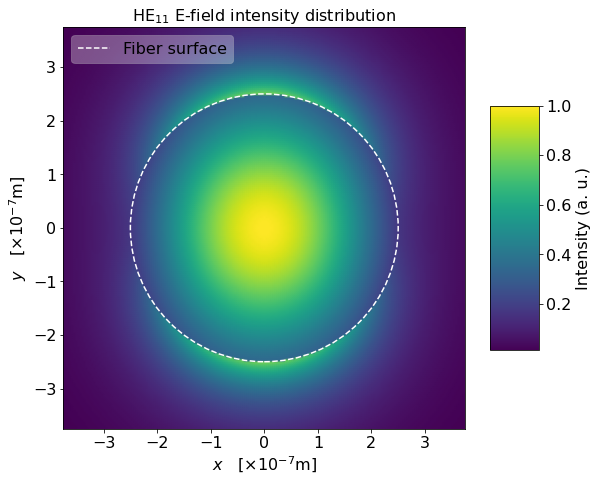

In [7]:
fig, ax = plt.subplots(figsize=(9, 9))

X = np.linspace(-1.5 * a, 1.5 * a, 200)
Y = np.linspace(-1.5 * a, 1.5 * a, 200)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
P = np.arctan2(Y, X)
pol = np.pi / 2
I = (np.abs(he11.Ex(R, P, pol=pol)) ** 2
     + np.abs(he11.Ey(R, P, pol=pol)) ** 2
     + np.abs(he11.Ez(R, P, pol=pol)) ** 2)

mesh = ax.pcolormesh(X * 1e7, Y * 1e7, I / np.amax(I), shading="gouraud")
cb = fig.colorbar(mesh, shrink=.5, aspect=5)
circ = plt.Circle((0, 0), radius=a*1e7, color='w', ls='--', lw=1.5, fill=False)
ax.add_patch(circ)
line = Line2D([0], [0], color='w', ls='--', lw=1.5, label="Fiber surface")

ax.set_aspect("equal")
ax.set_xlabel(r"$x \quad [\times 10^{-7} \mathrm{m}]$", size=16)
ax.set_ylabel(r"$y \quad [\times 10^{-7} \mathrm{m}]$", size=16)
ax.tick_params(axis="both", labelsize=16)
ax.legend(handles=[line], fontsize=16, loc=2, framealpha=0.3)
ax.set_title(r"$\mathrm{HE_{11}}$ E-field intensity distribution", fontsize=16)
cb.set_label("Intensity (a. u.)", size=16)
cb.ax.tick_params(labelsize=16)
plt.show()

Now, with the same setup except the fiber is thicker, higher-order modes are excited as well as the fundamental mode.

In [13]:
args = lam, a, n_1, n_2 = 780e-9, 3 * 250e-9, 1.45, 1.00
print(utl.propagatable_modes(*args))

{'TE': ['01', '02'], 'TM': ['01', '02'], 'EH': ['11', '21'], 'HE': ['11', '12', '21', '22', '31', '41']}


Electric field patterns of some of these modes:

In [9]:
te = TE.lowest_order(*args)
tm = TM.lowest_order(*args)
eh = EH.lowest_order(*args)
he = HE(2, 1, *args)

X = np.linspace(-a, a, 20)
Y = np.linspace(-a, a, 20)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
P = np.arctan2(Y, X)
phase = np.pi / 2

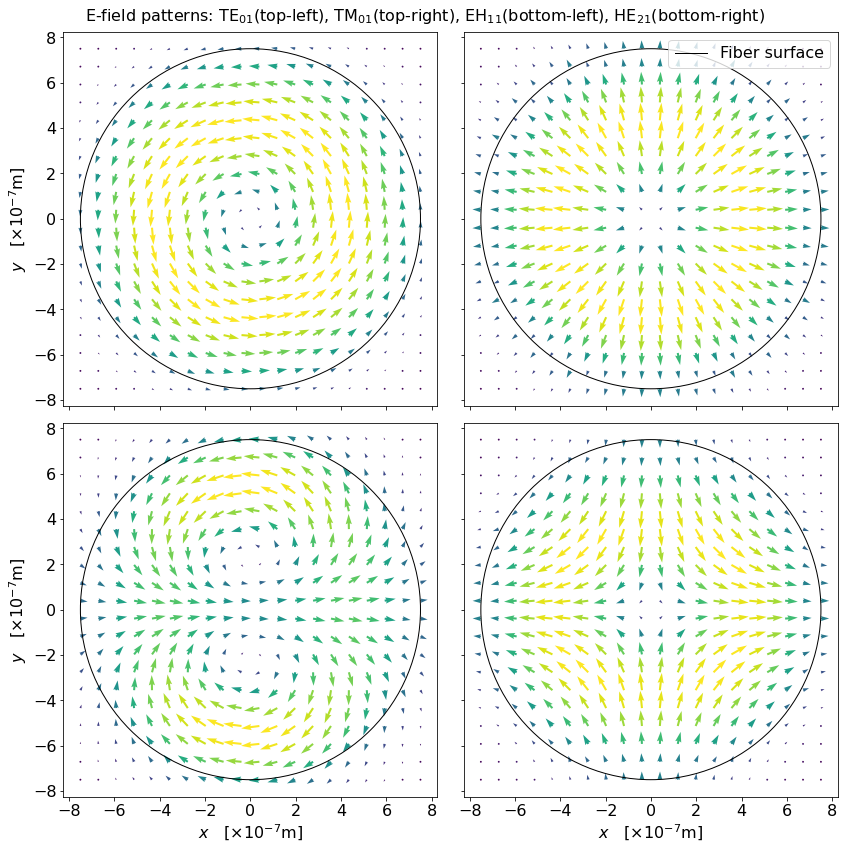

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)

EX = te.Ex(R, P, phase=phase)
EY = te.Ey(R, P, phase=phase)
circ = plt.Circle((0, 0), radius=a * 1e7, color='k', lw=1, fill=False)
ax1.add_patch(circ)
ax1.quiver(
    X * 1e7, Y * 1e7, np.real(EX), np.real(EY),
    np.sqrt(np.abs(EX) ** 2 + np.abs(EY) ** 2), width=5.5e-3
)

EX = tm.Ex(R, P)
EY = tm.Ey(R, P)
circ = plt.Circle((0, 0), radius=a * 1e7, color='k', lw=1, fill=False)
ax2.add_patch(circ)
ax2.quiver(
    X * 1e7, Y * 1e7, np.imag(EX), np.imag(EY),
    np.sqrt(np.abs(EX) ** 2 + np.abs(EY) ** 2), width=5.5e-3
)

EX = eh.Ex(R, P)
EY = eh.Ey(R, P)
circ = plt.Circle((0, 0), radius=a * 1e7, color='k', lw=1, fill=False)
ax3.add_patch(circ)
ax3.quiver(
    X * 1e7, Y * 1e7, np.imag(EX), np.imag(EY),
    np.sqrt(np.abs(EX) ** 2 + np.abs(EY) ** 2), width=5.5e-3
)

EX = he.Ex(R, P, phase=phase)
EY = he.Ey(R, P, phase=phase)
circ = plt.Circle((0, 0), radius=a * 1e7, color='k', lw=1, fill=False)
ax4.add_patch(circ)
ax4.quiver(
    X * 1e7, Y * 1e7, np.real(EX), np.real(EY),
    np.sqrt(np.abs(EX) ** 2 + np.abs(EY) ** 2), width=5.5e-3
)

line = Line2D([0], [0], color='k', lw=1, label="Fiber surface")
ax2.legend(handles=[line], fontsize=16, loc=1)

ax1.set_aspect("equal")
ax2.set_aspect("equal")
ax3.set_aspect("equal")
ax4.set_aspect("equal")
ax1.set_ylabel(r"$y \quad [\times 10^{-7} \mathrm{m}]$", size=16)
ax3.set_ylabel(r"$y \quad [\times 10^{-7} \mathrm{m}]$", size=16)
ax3.set_xlabel(r"$x \quad [\times 10^{-7} \mathrm{m}]$", size=16)
ax4.set_xlabel(r"$x \quad [\times 10^{-7} \mathrm{m}]$", size=16)
ax1.tick_params(axis="y", labelsize=16)
ax3.tick_params(axis="both", labelsize=16)
ax4.tick_params(axis="x", labelsize=16)
fig.suptitle(r"E-field patterns: $\mathrm{TE_{01}}$(top-left), $\mathrm{TM_{01}}$(top-right), "
             + r"$\mathrm{EH_{11}}$(bottom-left), $\mathrm{HE_{21}}$(bottom-right)", fontsize=16)
fig.tight_layout()
plt.show()